# **1. Perkenalan Dataset**


Data yang digunakan adalah [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) yang diperoleh dari Kaggle. Dataset Telco Customer Churn adalah kumpulan data yang banyak digunakan untuk penelitian dan demonstrasi dalam bidang prediksi churn—yakni proses memodelkan pelanggan yang kemungkinan besar akan berhenti berlangganan suatu layanan.

Telco Customer Churn menyediakan gambaran komprehensif tentang perilaku pelanggan telco—mulai dari karakteristik individual, pilihan paket layanan, hingga pola pembayaran—sehingga dapat digunakan untuk membangun model prediktif yang membantu perusahaan mengidentifikasi pelanggan berisiko tinggi dan merancang strategi retensi yang tepat.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer # Untuk menangani missing values

import kagglehub
import os
import zipfile
import joblib
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, kita perlu memuat dataset ke dalam notebook. Bagian ini otomatis mengambil dataset Telco Customer Churn langsung dari Kaggle, menyesuaikan apakah hasil unduhan berupa arsip ZIP atau folder biasa, lalu mengekstrak jika perlu dan mencari file CSV di dalamnya. Setelah menemukan file CSV, ia memuat seluruh data ke dalam sebuah objek pandas.DataFrame yang siap digunakan untuk analisis atau pemodelan, dan akhirnya menampilkan lima baris pertama sebagai verifikasi bahwa proses loading berjalan dengan benar.

In [2]:
# Download dataset (akan mengembalikan path ke folder atau file .zip)
data_path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path yang dikembalikan kagglehub:", data_path)

# Jika data_path adalah file ZIP, ekstrak dulu
if data_path.endswith(".zip"):
    extract_dir = "/content/telco_churn"
    os.makedirs(extract_dir, exist_ok=True)
    with zipfile.ZipFile(data_path, "r") as z:
        z.extractall(extract_dir)
    data_dir = extract_dir
else:
    # Jika data_path adalah folder, langsung gunakan
    data_dir = data_path

# Lihat isi folder untuk menemukan file .csv
print("Isi folder:", os.listdir(data_dir))

# Temukan file CSV
csv_files = [f for f in os.listdir(data_dir) if f.lower().endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("Tidak ada file CSV di dalam folder!")
csv_path = os.path.join(data_dir, csv_files[0])
print("Membaca file CSV:", csv_path)

# Load ke DataFrame
df = pd.read_csv(csv_path)

# Cek 5 baris pertama
df.head()

Path yang dikembalikan kagglehub: /kaggle/input/telco-customer-churn
Isi folder: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']
Membaca file CSV: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Variabel-variabel dalam Dataset Telco Customer Churn:**
- `customerID`: ID unik untuk masing-masing pelanggan. Ini adalah kolom yang digunakan untuk mengidentifikasi setiap pelanggan secara unik.

- `gender`: Jenis kelamin pelanggan.

- `SeniorCitizen`: Menunjukkan apakah pelanggan adalah senior citizen (1 = Ya, 0 = Tidak).

- `Partner`: Menunjukkan apakah pelanggan memiliki pasangan atau tidak.

- `Dependents`: Menunjukkan apakah pelanggan memiliki tanggungan (dependen) atau tidak.

- `tenure`: Jumlah bulan pelanggan telah menggunakan layanan dari perusahaan.

- `PhoneService`: Menunjukkan apakah pelanggan memiliki layanan telepon dari perusahaan atau tidak.

- `MultipleLines`: Menunjukkan apakah pelanggan memiliki lebih dari satu jalur telepon.

- `InternetService`: Jenis layanan internet yang dimiliki pelanggan.

- `OnlineSecurity`: Menunjukkan apakah pelanggan memiliki layanan keamanan online.

- `OnlineBackup`: Menunjukkan apakah pelanggan memiliki layanan backup online.

- `DeviceProtection`: Menunjukkan apakah pelanggan memiliki layanan perlindungan perangkat.

- `TechSupport`: Menunjukkan apakah pelanggan memiliki akses ke dukungan teknis.

- `StreamingTV`: Menunjukkan apakah pelanggan memiliki layanan streaming TV.

- `StreamingMovies`: Menunjukkan apakah pelanggan memiliki layanan streaming film.

- `Contract`: Jenis kontrak pelanggan dengan perusahaan.

- `PaperlessBilling`: Menunjukkan apakah pelanggan memilih tagihan tanpa kertas.

- `PaymentMethod`: Menunjukkan metode pembayaran yang digunakan oleh pelanggan.

- `MonthlyCharges`: Jumlah yang dibayar oleh pelanggan setiap bulan untuk layanan yang mereka pilih.

- `TotalCharges`: Total jumlah yang dibayar oleh pelanggan selama durasi langganan mereka (tenure).

- `Churn`: Menunjukkan apakah pelanggan berhenti berlangganan (churn) atau tidak. Ini adalah target variabel dalam analisis prediksi churn.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

In [3]:
# 1. Struktur Data
print("=== 1. Struktur Data ===")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nInfo:")
df.info()
print("\nDescriptive Statistics (Numeric):")
print(df.describe())
print("\nDescriptive Statistics (Categorical):")
print(df.select_dtypes(include=['object']).describe())

=== 1. Struktur Data ===
Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   o

Bagian struktur data ini menampilkan bentuk (`shape`) dataset—yaitu jumlah baris dan kolom—serta daftar nama kolom. Pemanggilan `df.info()` memberikan ringkasan tipe data untuk setiap kolom dan jumlah non-null-nya, sehingga bisa segera melihat mana yang perlu ditangani. Statistika deskriptif `df.describe()` untuk fitur numerik menampilkan nilai rata-rata, median, standar deviasi, min, dan max, sedangkan `df.select_dtypes(include=['object']).describe()` memberi gambaran jumlah kategori serta frekuensi teratas di tiap kolom kategorikal.

In [4]:
# 2. Missing Values
print("\n=== 2. Missing Values per Column ===")
print(df.isnull().sum())


=== 2. Missing Values per Column ===
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Dengan `df.isnull().sum()`, kita dapat mengecek berapa nilai yang hilang (null) di masing-masing kolom. Ini penting untuk memastikan tidak ada celah data yang kelak akan memengaruhi perhitungan statistik atau pelatihan model. Pada dataset ini semua baris memiliki nilai valid di setiap kolom, dari `customerID` hingga `Churn`.

In [5]:
# 3. Unique Values per Categorical Column
print("\n=== 3. Unique Values per Categorical Column ===")
for col in df.select_dtypes(include=['object']).columns:
    uniques = df[col].unique()
    print(f"{col} ({len(uniques)}): {uniques}")


=== 3. Unique Values per Categorical Column ===
customerID (7043): ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender (2): ['Female' 'Male']
Partner (2): ['Yes' 'No']
Dependents (2): ['No' 'Yes']
PhoneService (2): ['No' 'Yes']
MultipleLines (3): ['No phone service' 'No' 'Yes']
InternetService (3): ['DSL' 'Fiber optic' 'No']
OnlineSecurity (3): ['No' 'Yes' 'No internet service']
OnlineBackup (3): ['Yes' 'No' 'No internet service']
DeviceProtection (3): ['No' 'Yes' 'No internet service']
TechSupport (3): ['No' 'Yes' 'No internet service']
StreamingTV (3): ['No' 'Yes' 'No internet service']
StreamingMovies (3): ['No' 'Yes' 'No internet service']
Contract (3): ['Month-to-month' 'One year' 'Two year']
PaperlessBilling (2): ['Yes' 'No']
PaymentMethod (4): ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges (6531): ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn (2): ['No' 'Yes']


Perulangan pada kolom objek (`df.select_dtypes(include=['object'])`) dan pencetakan `df[col].unique()` beserta hitungan `len(uniques)` membantu mengetahui domain kategori di setiap variabel. Ini penting untuk memahami sebaran kategori, mendeteksi typo atau kategori yang terlalu granular, dan menentukan apakah perlu melakukan penggabungan kategori atau encoding khusus.


=== 4. Distribusi Target Churn ===


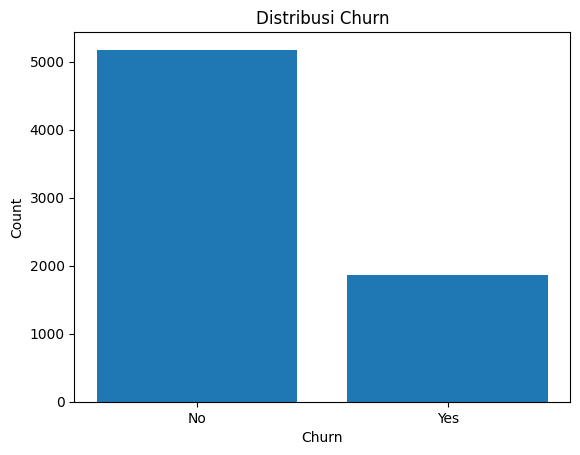

In [6]:
# 4. Distribusi Target Churn
print("\n=== 4. Distribusi Target Churn ===")
counts = df['Churn'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Bagian ini memvisualisasikan frekuensi label churn menggunakan bar chart. Pelanggan yang churn masih tergolong signifikan. Ini menunjukkan potensi kerugian pendapatan yang cukup besar jika tidak ditangani. Dataset ini menunjukkan ketidakseimbangan kelas: non-churn tumbuh hampir tiga kali lipat churn.


=== 5. Distribusi Fitur Numerik ===


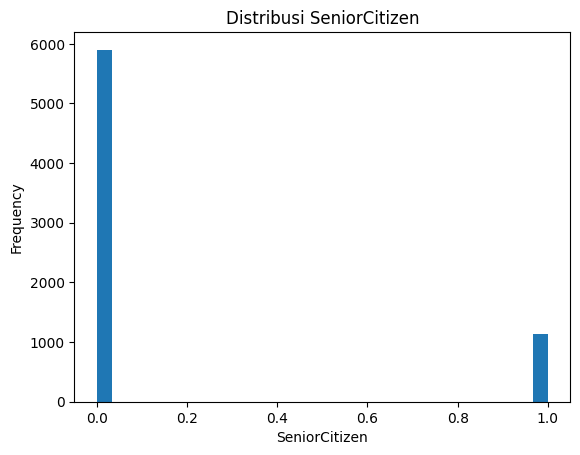

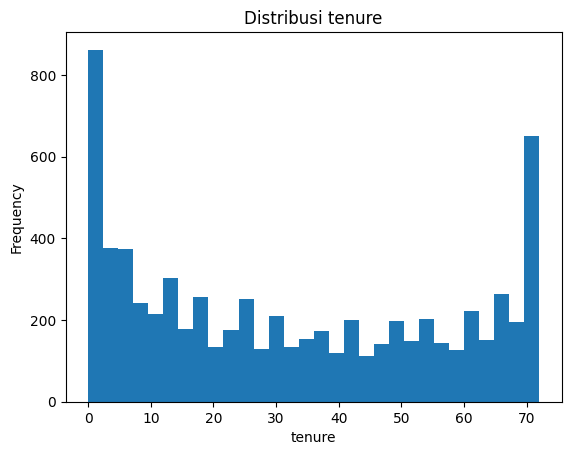

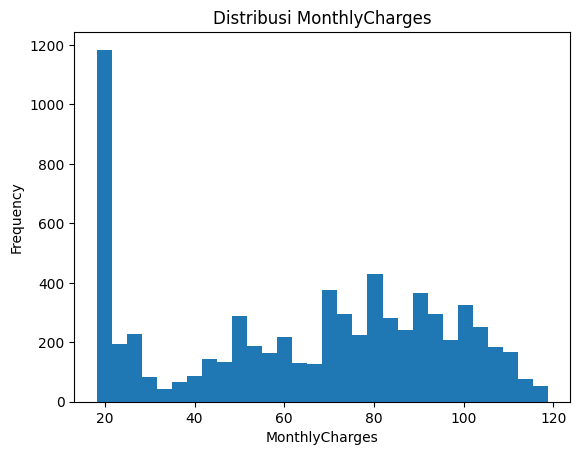

In [7]:
# 5. Distribusi Fitur Numerik
print("\n=== 5. Distribusi Fitur Numerik ===")
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Secara umum, fitur numerik menunjukkan bahwa hanya sekitar 16 % pelanggan adalah senior citizen, sedangkan mayoritas 84 % adalah non-senior. Distribusi `tenure` sangat terpusat pada dua kelompok—pelanggan baru (`tenure` mendekati 0 bulan) dan pelanggan yang sudah sangat lama (mendekati 72 bulan), dengan proporsi lebih kecil di rentang menengah. Sedangkan jika kita perhatikan histogram `MonthlyCharges`, ada lonjakan frekuensi yang sangat tinggi di ujung bawah (sekitar 18–25), menandakan banyak pelanggan memakai paket paling dasar dengan biaya bulanan terendah. Di samping itu, kita juga melihat distribusi lebih merata dan sedikit menurun di rentang menengah–tinggi (60–120).


=== 6. Boxplot Numeric by Churn ===


<Figure size 640x480 with 0 Axes>

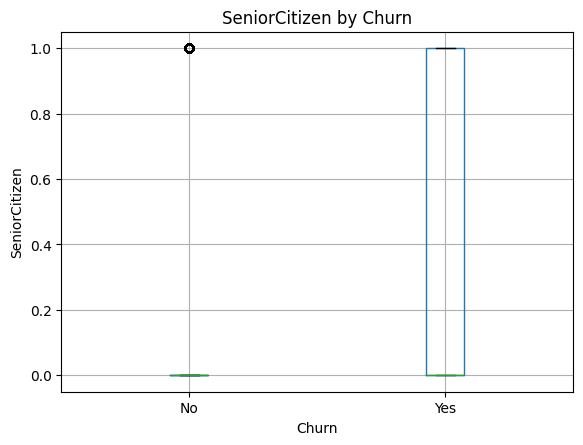

<Figure size 640x480 with 0 Axes>

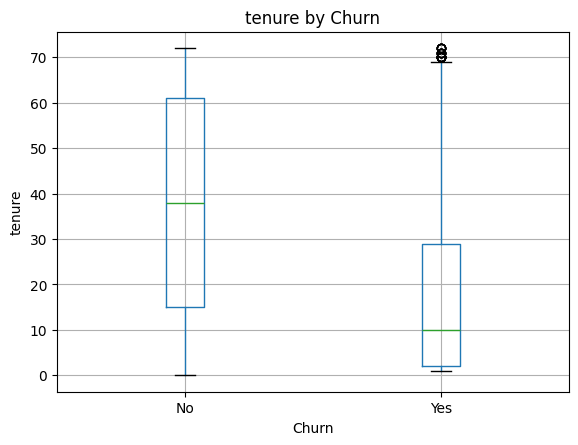

<Figure size 640x480 with 0 Axes>

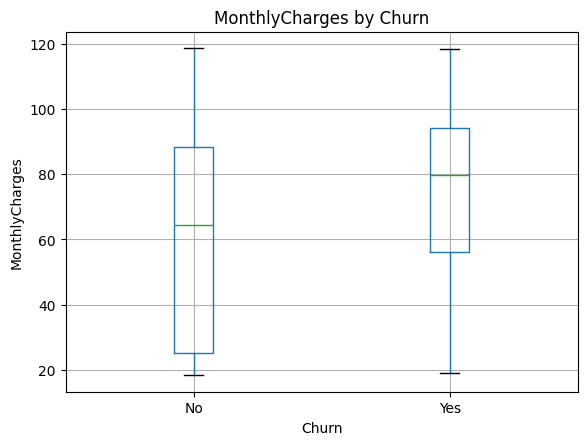

In [8]:
# 6. Boxplot Numeric by Churn
print("\n=== 6. Boxplot Numeric by Churn ===")
for col in num_cols:
    plt.figure()
    df.boxplot(column=col, by='Churn')
    plt.title(f'{col} by Churn')
    plt.suptitle('')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()


Boxplot tiap fitur numerik dikelompokkan berdasarkan status churn `(by='Churn')` memperlihatkan perbandingan distribusi—median, kuartil, dan outlier—antara pelanggan yang churn dan tidak. Boxplot ini menunjukkan bahwa atribut `SeniorCitizen` tidak membedakan secara signifikan antara pelanggan yang churn maupun tidak (keduanya didominasi nilai 0), sementara `tenure` pada kelompok churn jauh lebih rendah (median ≈ 9 bulan vs ≈ 38 bulan), dan `MonthlyCharges` pada kelompok churn cenderung lebih tinggi (median ≈ 80 vs ≈ 65). Dengan kata lain, pelanggan baru dan pelanggan dengan biaya langganan bulanan yang lebih besar memiliki risiko churn lebih tinggi, sedangkan status senior citizen tampak kurang berpengaruh.


=== 7. Correlation Matrix ===


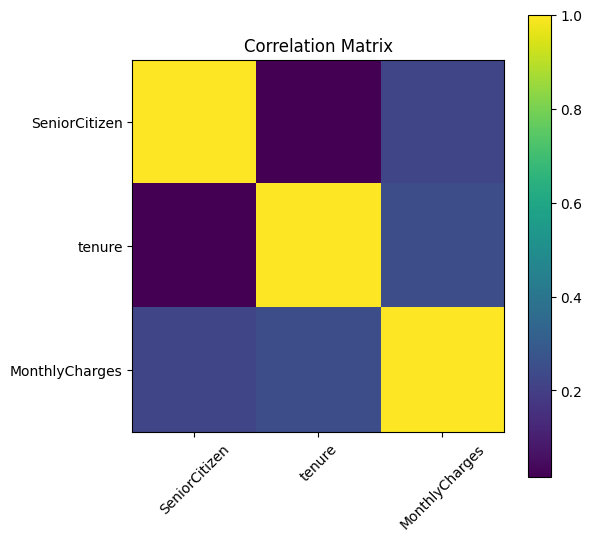

In [9]:
# 7. Correlation Matrix
print("\n=== 7. Correlation Matrix ===")
corr = df[num_cols].corr()
plt.figure(figsize=(6,6))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Correlation Matrix')
plt.show()

Matriks korelasi antar fitur numerik divisualisasikan dengan heatmap. Korelasi tinggi (mendekati +1 atau –1) mengindikasikan fitur-fitur yang redundan atau berpotensi multikolinearitas. Heatmap korelasi menunjukkan bahwa SeniorCitizen hampir tidak berkorelasi dengan tenure (r≈0) dan hanya sedikit berkorelasi positif dengan MonthlyCharges (r≈0,2); sedangkan tenure dan MonthlyCharges juga hanya memiliki korelasi lemah positif (r≈0,23), artinya pelanggan yang sudah lama berlangganan cenderung membayar sedikit lebih tinggi tetapi hubungan ini sangat minimal. Karena tidak ada pasangan fitur numerik dengan korelasi kuat (|r|>0,8), multikolinearitas bukanlah masalah, sehingga ketiga fitur ini dapat langsung digunakan dalam model.


=== 8. Persentase Churn per Fitur Kategorikal ===


<Figure size 800x400 with 0 Axes>

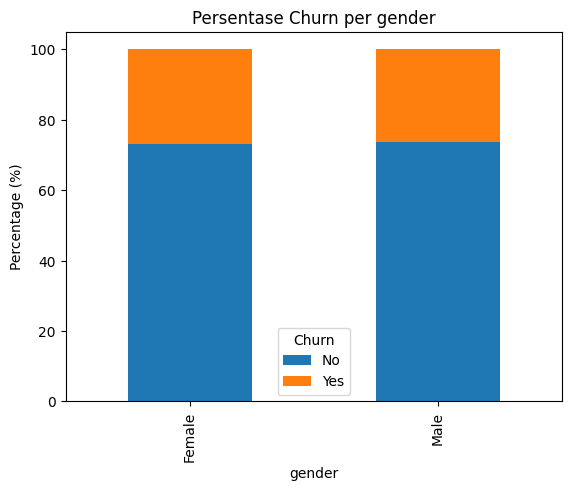

<Figure size 800x400 with 0 Axes>

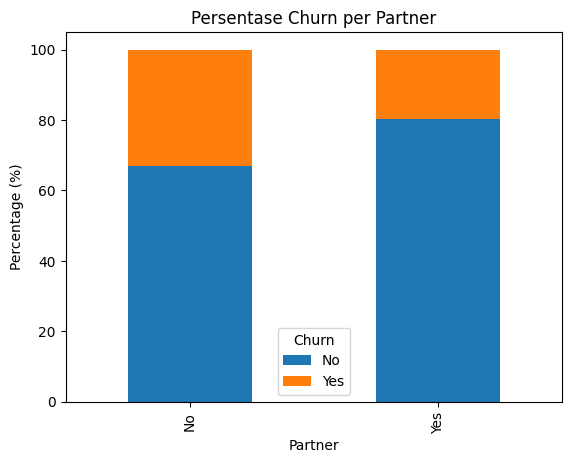

<Figure size 800x400 with 0 Axes>

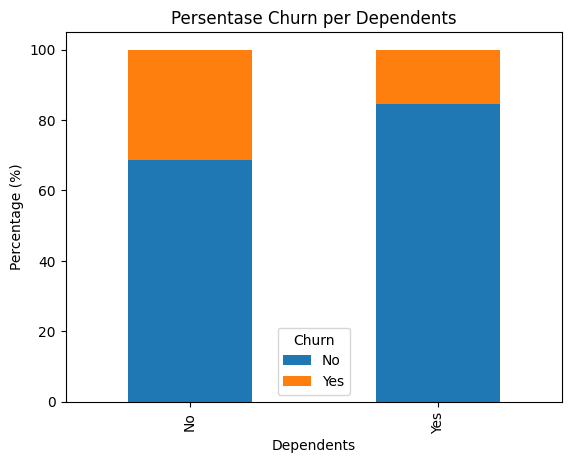

<Figure size 800x400 with 0 Axes>

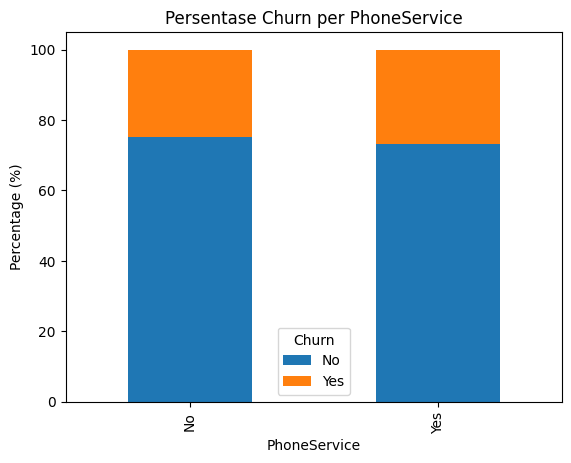

<Figure size 800x400 with 0 Axes>

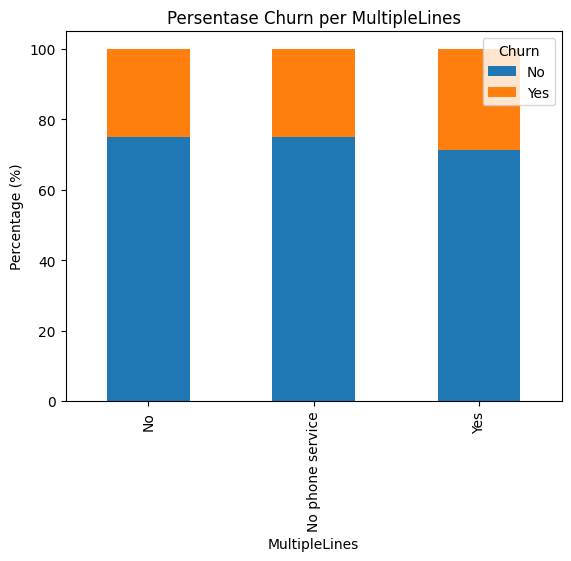

<Figure size 800x400 with 0 Axes>

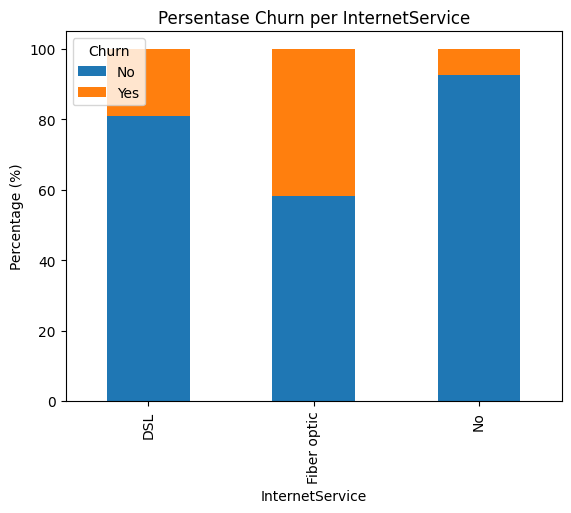

<Figure size 800x400 with 0 Axes>

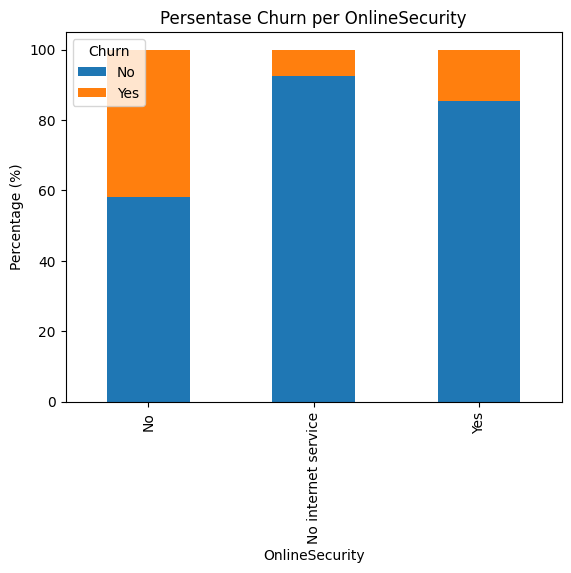

<Figure size 800x400 with 0 Axes>

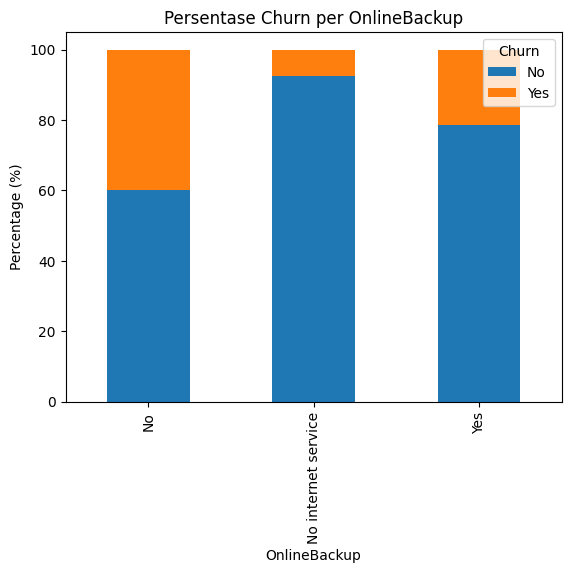

<Figure size 800x400 with 0 Axes>

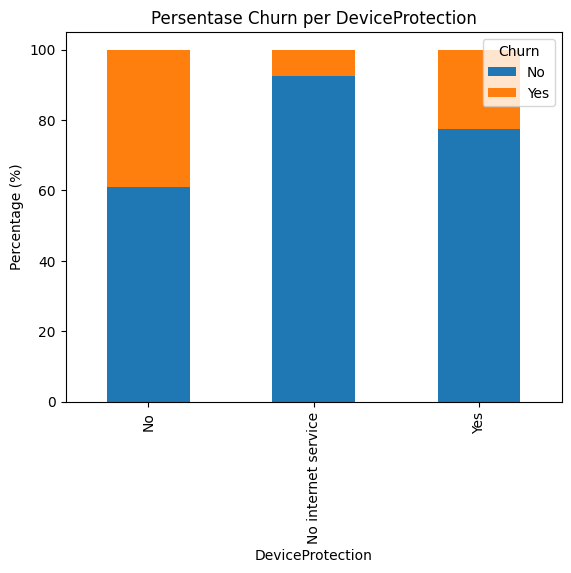

<Figure size 800x400 with 0 Axes>

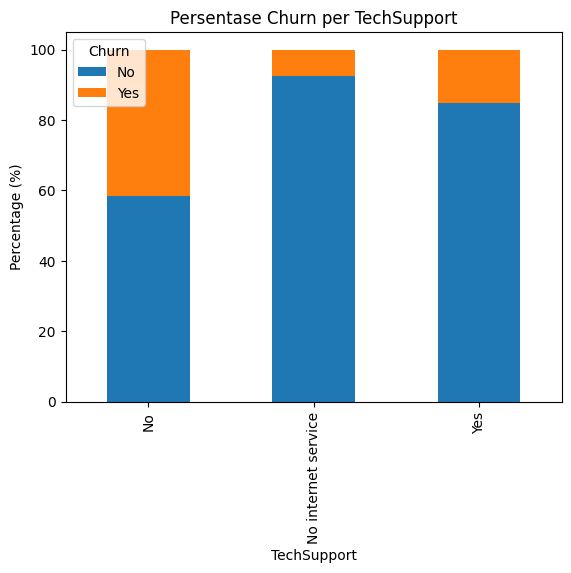

<Figure size 800x400 with 0 Axes>

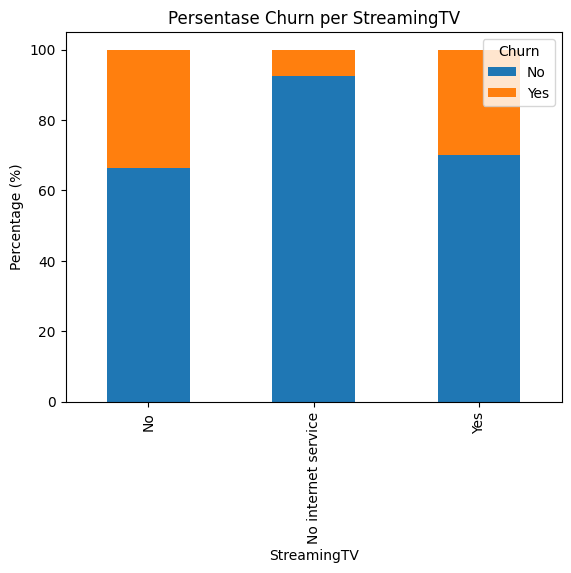

<Figure size 800x400 with 0 Axes>

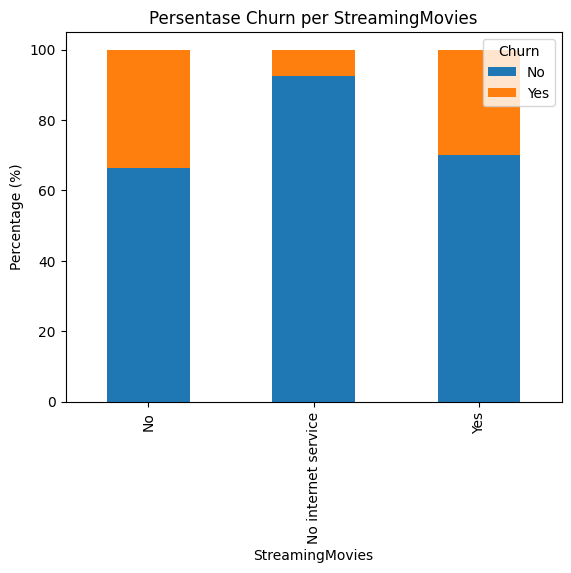

<Figure size 800x400 with 0 Axes>

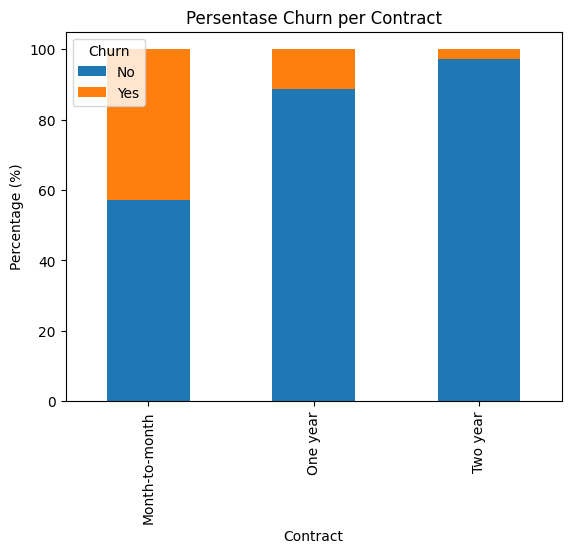

<Figure size 800x400 with 0 Axes>

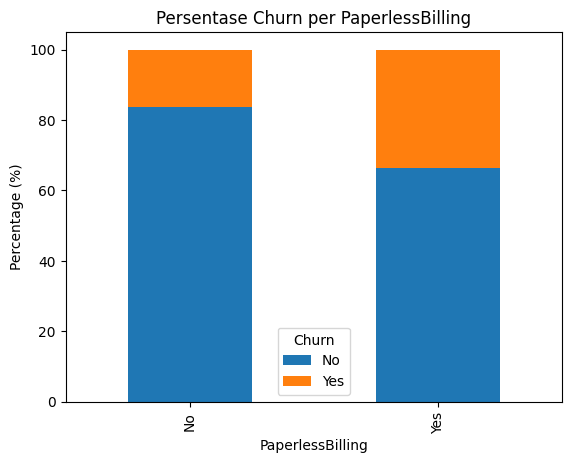

<Figure size 800x400 with 0 Axes>

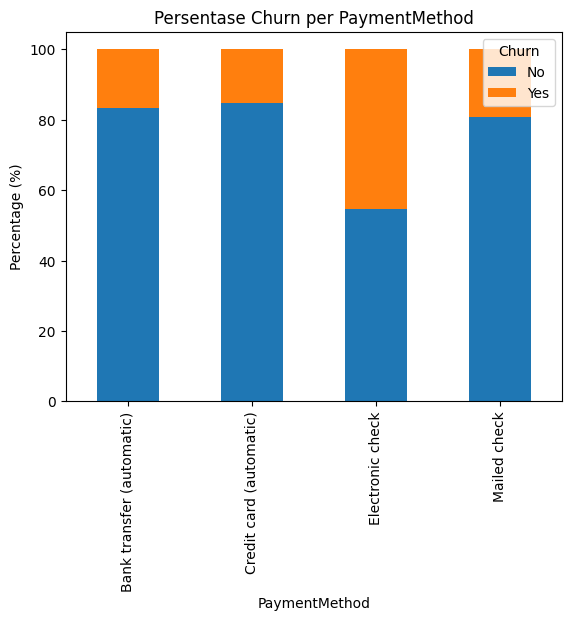

<Figure size 800x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


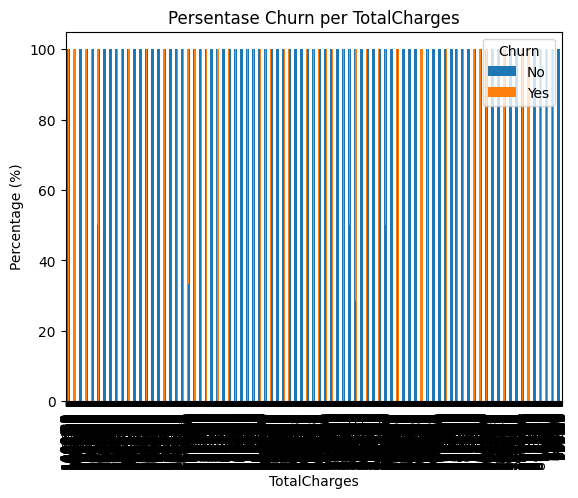

In [10]:
# 8. Persentase Churn per Fitur Kategorikal
print("\n=== 8. Persentase Churn per Fitur Kategorikal ===")
cat_cols = df.select_dtypes(include=['object']).columns.drop(['customerID','Churn'])
for col in cat_cols:
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    plt.figure(figsize=(8,4))
    ct.plot(kind='bar', stacked=True)
    plt.title(f'Persentase Churn per {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.legend(title='Churn')
    plt.show()

Terakhir, stacked bar chart mengilustrasikan persentase churn (Yes vs No) untuk tiap kategori pada variabel kategorikal.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika kita menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Rangkaian data preprocessing yang diterapkan pada eksperimen ini adalah sebagai berikut:

1. Merubah 'No internet service' menjadi 'No' serta 'No phone service' menjadi 'No' untuk kekonsistenan nilai dalam beberapa fitur
2. Merubah 'TotalCharges' menjadi numerik dan mengisi missing 'TotalCharges' dengan NaN terlebih dahulu lalu diimputasi nantinya
3. Menangani Missing Values untuk TotalCharges menggunakan SimpleImputer dengan 'mean' untuk kolom numerik
4. Mengeluarkan customerID karena tidak diperlukan untuk modelling
5. memisahkan fitur (X) dan target (y)
6. mengubah target variabel 'No'/'Yes' ke 0/1 (Label Encoding for binary target)
7. Identifikasi kategorikal dan numerikal kolom untuk OneHotEncoding dan Scaling
8. Menerapkan One-Hot Encoding untuk categorical features
9. Standarisasi fitur numerik menggunakan MinMaxScaler
10. Menggabungkan praproses fitur numerik dan kategorik
11. membagi data train dan tes
12. Menyimpan data hasil preprocessing

In [11]:
# 1. Merubah 'No internet service' menjadi 'No' serta 'No phone service' menjadi 'No' untuk kekonsistenan nilai dalam beberapa fitur
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].replace({'No internet service': 'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# 2. Merubah 'TotalCharges' menjadi numerik dan mengisi missing 'TotalCharges' dengan NaN terlebih dahulu lalu diimputasi nantinya
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nMissing values after converting TotalCharges:")
print(df.isnull().sum())


Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
# 3. Menangani Missing Values untuk TotalCharges menggunakan SimpleImputer dengan 'mean' untuk kolom numerik
imputer_numeric = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer_numeric.fit_transform(df[['TotalCharges']])
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
# 4. Mengeluarkan customerID karena tidak diperlukan untuk modelling
df2 = df.drop('customerID', axis=1)

# 5. memisahkan fitur (X) dan target (y)
X = df2.drop('Churn', axis=1)
y = df2['Churn']

# 6. mengubah target variabel 'No'/'Yes' ke 0/1 (Label Encoding for binary target)
le = LabelEncoder()
y_encoded = le.fit_transform(y) # No=0, Yes=1
print(f"\nTarget variable mapping: {list(le.classes_)} -> {le.transform(le.classes_)}")


Target variable mapping: ['No', 'Yes'] -> [0 1]


In [14]:
# 7. Identifikasi kategorikal dan numerikal kolom untuk OneHotEncoding dan Scaling
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 8. Menerapkan One-Hot Encoding untuk categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded = ohe.fit_transform(X[categorical_cols])
X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols))

# 9. Standarisasi fitur numerik menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])
X_numerical_df = pd.DataFrame(X_numerical_scaled, columns=numerical_cols)

# 10. Menggabungkan praproses fitur numerik dan kategorik
X_processed = pd.concat([X_numerical_df, X_categorical_df], axis=1)

print("\nShape of X_processed after One-Hot Encoding and Scaling:", X_processed.shape)
print("First 5 rows of X_processed:")
print(X_processed.head())


Shape of X_processed after One-Hot Encoding and Scaling: (7043, 38)
First 5 rows of X_processed:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
0            0.0  0.013889        0.115423      0.001275            1.0   
1            0.0  0.472222        0.385075      0.215867            0.0   
2            0.0  0.027778        0.354229      0.010310            0.0   
3            0.0  0.625000        0.239303      0.210241            0.0   
4            0.0  0.027778        0.521891      0.015330            1.0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0          0.0         0.0          1.0            1.0             0.0  ...   
1          1.0         1.0          0.0            1.0             0.0  ...   
2          1.0         1.0          0.0            1.0             0.0  ...   
3          1.0         1.0          0.0            1.0             0.0  ...   
4          0.0         1.0          0.0            1.0  

In [15]:
# 11. membagi data train dan tes
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (5634, 38)
Shape of X_test: (1409, 38)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [18]:
# 12. Save preprocessed data
preprocessed_output_path = '/content/drive/My Drive/Laskar AI/Submission/a001ybm349 - Submission 12/preprocessing/telco_customer_churn_preprocessed.csv'
X_processed.to_csv(preprocessed_output_path, index=False)
y_df = pd.DataFrame(y_encoded, columns=['Churn_Encoded'])
y_df.to_csv('/content/drive/My Drive/Laskar AI/Submission/a001ybm349 - Submission 12/preprocessing/telco_customer_churn_target_encoded.csv', index=False) # Save target too
print(f"\nPreprocessed data saved to {preprocessed_output_path}")


Preprocessed data saved to /content/drive/My Drive/Laskar AI/Submission/a001ybm349 - Submission 12/preprocessing/telco_customer_churn_preprocessed.csv
